In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
de_dir = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/2_IL2RAKO_Nascent/3_DEseq2'
out_dir = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/2_IL2RAKO_Nascent'

### Create summary plot

In [22]:
sum_df = pd.DataFrame({"hour":[], "WT-KO_up":[], "WT-KO_dn":[], 
                       "WT-nav_up":[], "WT-nav_dn":[], "KO-nav_up":[], "KO_nav_dn":[],
                       "WT-KO_up_and_WT-nav_up":[], "WT-KO_dn_and_WT-nav_dn":[],
                      "WT-KO_up_and_WT-nav_up_pctg":[],"WT-KO_dn_and_WT-nav_dn_pctg":[]})
for hour in [0, 6, 24, 48]:
    wt_ko_file = de_dir + "/WT_%sh_vs_KO_%sh.csv"%(hour, hour)
    wt_ko_df = pd.read_csv(wt_ko_file)
    wt_ko_df.columns = ["gene_name"] + wt_ko_df.columns.tolist()[1:]
    
    wt_ko_df_sig = wt_ko_df[wt_ko_df['padj']<= 0.05]
    wt_ko_df_up = wt_ko_df_sig[wt_ko_df_sig['log2FoldChange'] > 0]
    wt_ko_df_dn = wt_ko_df_sig[wt_ko_df_sig['log2FoldChange'] < 0]
    wt_ko_up = len(set(wt_ko_df_up['gene_name'].tolist()))
    wt_ko_dn = len(set(wt_ko_df_dn['gene_name'].tolist()))
    if hour != 0:
        wt_nav_file = de_dir + "/WT_%sh_vs_WT_0h.csv"%(hour)
        wt_nav_df = pd.read_csv(wt_nav_file)
        wt_nav_df.columns = ["gene_name"] + wt_nav_df.columns.tolist()[1:]
        wt_nav_df_sig = wt_nav_df[wt_nav_df['padj'] <= 0.05]
        wt_nav_df_up = wt_nav_df_sig[wt_nav_df_sig['log2FoldChange'] > 0]
        wt_nav_df_dn = wt_nav_df_sig[wt_nav_df_sig['log2FoldChange'] < 0]
        wt_up = len(set(wt_nav_df_up['gene_name'].tolist()))
        wt_dn = len(set(wt_nav_df_dn['gene_name'].tolist()))

        ko_nav_file = de_dir + "/KO_%sh_vs_KO_0h.csv"%(hour)
        ko_nav_df = pd.read_csv(ko_nav_file)
        ko_nav_df.columns = ["gene_name"] + ko_nav_df.columns.tolist()[1:]
        ko_nav_df_sig = ko_nav_df[ko_nav_df['padj'] <= 0.05]
        ko_nav_df_up = ko_nav_df_sig[ko_nav_df_sig['log2FoldChange'] > 0]
        ko_nav_df_dn = ko_nav_df_sig[ko_nav_df_sig['log2FoldChange'] < 0]
        ko_up = len(set(ko_nav_df_up['gene_name'].tolist()))
        ko_dn = len(set(ko_nav_df_up['gene_name'].tolist()))
        
        up_overlap = len(set(wt_ko_df_up['gene_name'].tolist()) & set(wt_nav_df_up['gene_name'].tolist()))
        dn_overlap = len(set(wt_ko_df_dn['gene_name'].tolist()) & set(wt_nav_df_dn['gene_name'].tolist()))
        
        hour_row = {"hour":hour, "WT-KO_up":wt_ko_up, "WT-KO_dn":wt_ko_dn,
                    "WT-nav_up":wt_up, "WT-nav_dn":wt_dn, "KO-nav_up":ko_up, "KO_nav_dn":ko_dn,
                    "WT-KO_up_and_WT-nav_up":up_overlap, "WT-KO_dn_and_WT-nav_dn":dn_overlap,
                    "WT-KO_up_and_WT-nav_up_pctg":up_overlap/wt_up*100, 
                    "WT-KO_dn_and_WT-nav_dn_pctg":dn_overlap/wt_dn*100}
    else:
        wt_up, wt_dn, ko_up, ko_dn, up_overlap, dn_overlap = 0,0,0,0,0,0
        
        hour_row = {"hour":hour, "WT-KO_up":wt_ko_up, "WT-KO_dn":wt_ko_dn,
                    "WT-nav_up":wt_up, "WT-nav_dn":wt_dn, "KO-nav_up":ko_up, "KO_nav_dn":ko_dn,
                    "WT-KO_up_and_WT-nav_up":up_overlap, "WT-KO_dn_and_WT-nav_dn":dn_overlap,
                    "WT-KO_up_and_WT-nav_up_pctg":0, 
                    "WT-KO_dn_and_WT-nav_dn_pctg":0}

    sum_df = sum_df.append(hour_row, ignore_index=True)

sum_df = sum_df.astype({"hour": int, "WT-KO_up":int, "WT-KO_dn":int, 
                       "WT-nav_up":int, "WT-nav_dn":int, "KO-nav_up":int, "KO_nav_dn":int,
                       "WT-KO_up_and_WT-nav_up":int, "WT-KO_dn_and_WT-nav_dn":int,
                      "WT-KO_up_and_WT-nav_up_pctg":float,"WT-KO_dn_and_WT-nav_dn_pctg":float})
sum_df.to_csv("%s/diff_numbers.csv"%out_dir, index=False)
sum_df

,hour,WT-KO_up,WT-KO_dn,WT-nav_up,WT-nav_dn,KO-nav_up,KO_nav_dn,WT-KO_up_and_WT-nav_up,WT-KO_dn_and_WT-nav_dn,WT-KO_up_and_WT-nav_up_pctg,WT-KO_dn_and_WT-nav_dn_pctg
0,0,9,58,0,0,0,0,0,0,0.000000,0.000000
1,6,46,54,3187,3518,2631,2631,33,44,1.035457,1.250711
2,24,111,137,3525,3506,3197,3197,76,79,2.156028,2.253280
3,48,591,535,3467,3168,2887,2887,416,336,11.998846,10.606061


In [23]:
sum_df_plot = sum_df.copy()
sum_df_plot['hour_str'] = ["%sh"%x for x in sum_df_plot['hour']]
sum_df_plot['WT-KO_dn'] = -sum_df_plot['WT-KO_dn']
sum_df_plot['WT-KO_dn_and_WT-nav_dn'] = -sum_df_plot['WT-KO_dn_and_WT-nav_dn']

In [24]:
sum_df_plot

,hour,WT-KO_up,WT-KO_dn,WT-nav_up,WT-nav_dn,KO-nav_up,KO_nav_dn,WT-KO_up_and_WT-nav_up,WT-KO_dn_and_WT-nav_dn,WT-KO_up_and_WT-nav_up_pctg,WT-KO_dn_and_WT-nav_dn_pctg,hour_str
0,0,9,-58,0,0,0,0,0,0,0.000000,0.000000,0h
1,6,46,-54,3187,3518,2631,2631,33,-44,1.035457,1.250711,6h
2,24,111,-137,3525,3506,3197,3197,76,-79,2.156028,2.253280,24h
3,48,591,-535,3467,3168,2887,2887,416,-336,11.998846,10.606061,48h


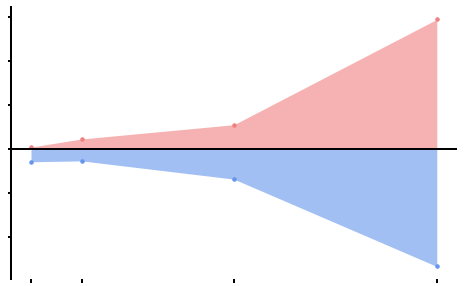

In [25]:
fig, ax = plt.subplots(figsize=(8,5))

ax.fill_between(x=sum_df_plot['hour'], y1=sum_df_plot['WT-KO_up'], color='lightcoral', 
                alpha=0.6, linewidth=0)
ax.fill_between(x=sum_df_plot['hour'], y1=sum_df_plot['WT-KO_dn'], color='cornflowerblue', 
                alpha=0.6, linewidth=0)
ax.scatter(x=sum_df_plot['hour'], y=sum_df_plot['WT-KO_up'], color='lightcoral', s=12)
ax.scatter(x=sum_df_plot['hour'], y=sum_df_plot['WT-KO_dn'], color='cornflowerblue', s=12)
ax.axhline(y=0, color='black', linewidth=2)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.set_xticks([0,6,24,48])

fig.savefig("%s/differential_dynamics_simp.png"%out_dir)

ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
fig.savefig("%s/differential_dynamics_simp_nolabel.png"%out_dir)

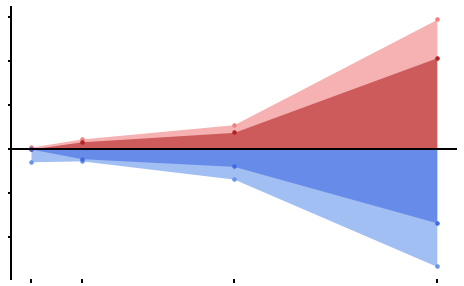

In [27]:
fig, ax = plt.subplots(figsize=(8,5))

ax.fill_between(x=sum_df_plot['hour'], y1=sum_df_plot['WT-KO_up'], color='lightcoral', 
                alpha=0.6, linewidth=0)
ax.fill_between(x=sum_df_plot['hour'], y1=sum_df_plot['WT-KO_dn'], color='cornflowerblue', 
                alpha=0.6, linewidth=0)
ax.fill_between(x=sum_df_plot['hour'], y1=sum_df_plot['WT-KO_up_and_WT-nav_up'], color='firebrick', 
                alpha=0.6, linewidth=0)
ax.fill_between(x=sum_df_plot['hour'], y1=sum_df_plot['WT-KO_dn_and_WT-nav_dn'], color='royalblue', 
                alpha=0.6, linewidth=0)
ax.scatter(x=sum_df_plot['hour'], y=sum_df_plot['WT-KO_up'], color='lightcoral', s=12)
ax.scatter(x=sum_df_plot['hour'], y=sum_df_plot['WT-KO_dn'], color='cornflowerblue', s=12)
ax.scatter(x=sum_df_plot['hour'], y=sum_df_plot['WT-KO_up_and_WT-nav_up'], color='firebrick', s=12)
ax.scatter(x=sum_df_plot['hour'], y=sum_df_plot['WT-KO_dn_and_WT-nav_dn'], color='royalblue', s=12)
ax.axhline(y=0, color='black', linewidth=2)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.set_xticks([0,6,24,48])

fig.savefig("%s/differential_dynamics.png"%out_dir)

ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
fig.savefig("%s/differential_dynamics_nolabel.png"%out_dir)

### Create signature

In [64]:
wt_ko_48_file = de_dir + '/WT_48h_vs_KO_48h.csv'
wt_ko_48_df = pd.read_csv(wt_ko_48_file)
wt_ko_48_df.columns = ['gene_name'] + wt_ko_48_df.columns.tolist()[1:]

In [103]:
wt_ko_48_df_sig = wt_ko_48_df[wt_ko_48_df['padj'] <= 0.05]
#wt_ko_48_df_sig = wt_ko_48_df_sig[wt_ko_48_df_sig['baseMean'] > 15]
wt_ko_48_df_sig_up = wt_ko_48_df_sig[wt_ko_48_df_sig['log2FoldChange'] > 1.2]
wt_ko_48_df_sig_dn = wt_ko_48_df_sig[wt_ko_48_df_sig['log2FoldChange'] < -1.2]

wt_ko_48_df_sig_up_gns = list(set(wt_ko_48_df_sig_up['gene_name'].tolist()))
wt_ko_48_df_sig_dn_gns = list(set(wt_ko_48_df_sig_dn['gene_name'].tolist()))

gs_df = pd.DataFrame({"gs_name": ["48h_IL2_promoted" for x in wt_ko_48_df_sig_up_gns] +
                                     ["48h_IL2_repressed" for x in wt_ko_48_df_sig_dn_gns],
                      "gene_symbol": wt_ko_48_df_sig_up_gns + wt_ko_48_df_sig_dn_gns})

gs_df.to_csv("%s/IL2_dependent_mm_sigs.csv"%(out_dir), index=False)
gs_df_sum = gs_df.groupby('gs_name').count()
gs_df_sum.columns = ['gene_number']
gs_df_sum.to_csv("%s/IL2_dependent_mm_sigs_sum.csv"%(out_dir))
print(gs_df_sum)

                   gene_number
gs_name                       
48h_IL2_promoted           223
48h_IL2_repressed          319
